In [1]:
import numpy as np
import faiss

from scipy.spatial import distance_matrix
from scipy.io import savemat

import matplotlib.pyplot as plt
import seaborn as sns
import vapeplot
vapeplot.set_palette('vaporwave')

In [2]:
num_points = 500

centers = np.array([
    [0.5, 0.5],
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

r = 0.25

seed = 19
np.random.seed(seed)
xs = np.random.rand(num_points, 2).astype(np.float32)

# process labels
d = distance_matrix(xs, centers)
onehot = d < r
onehot = np.hstack([((d < 0.25).sum(axis=1) == 0).reshape(-1, 1), onehot])
labels = np.argmax(onehot.astype(int), axis=1) + 1

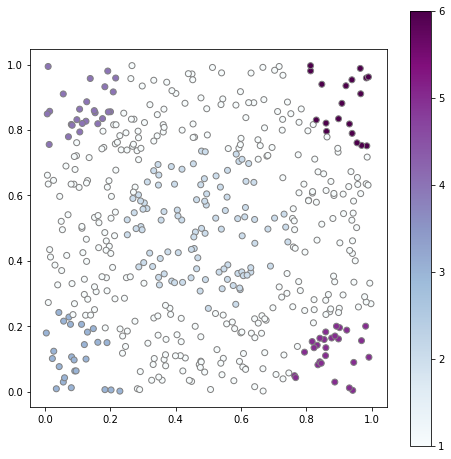

In [3]:
fig, ax = plt.subplots(figsize=(8, 8))
c = ax.scatter(xs[:, 0], xs[:, 1], cmap='BuPu', c=labels, edgecolors='grey')

ax.set_aspect('equal', 'box')
plt.colorbar(c);

In [4]:
k = 5

index = faiss.IndexFlatL2(2)
index.add(xs)

dists, nns = index.search(xs, k + 1)
dists = dists[:, 1:]
sims = np.exp(-dists)
nns = nns[:, 1:] + 1

In [5]:
sims

array([[0.9990383 , 0.99883145, 0.99841803, 0.9981645 , 0.996978  ],
       [0.99948895, 0.9989018 , 0.9977567 , 0.9968588 , 0.99666065],
       [0.99965525, 0.99864817, 0.9985307 , 0.99823004, 0.9979849 ],
       ...,
       [0.99962384, 0.99907184, 0.997499  , 0.99745816, 0.997306  ],
       [0.9999462 , 0.9980704 , 0.99777144, 0.9973341 , 0.9970728 ],
       [0.99895465, 0.9956977 , 0.99495447, 0.9942187 , 0.9901615 ]],
      dtype=float32)

In [6]:
nns

array([[296, 349, 196, 411, 418],
       [269, 138, 399, 393, 273],
       [239,  93, 360, 357, 392],
       ...,
       [178,  82, 213, 136, 373],
       [391,  99,  26, 277, 389],
       [278,  25, 371, 406,  89]])

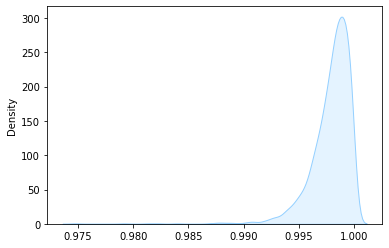

In [7]:
sns.kdeplot(sims.flatten(), shade=True);

In [8]:
if num_points > 50:
    savemat(
        f'../../data/square/square_nearest_neighbors_{seed + 1}.mat',
        {
            'nearest_neighbors': nns, 
            'similarities': sims, 
            'x': xs, 
            'labels': labels.reshape(-1, 1)
        }
    )
else:
    savemat(
        '../../data/square_small/square_small_nearest_neighbors.mat',
        {
            'nearest_neighbors': nns, 
            'similarities': sims, 
            'x': xs, 
            'labels': labels.reshape(-1, 1)
        }
    )

In [9]:
for label in range(1, 7):
    print(label, (labels == label).sum() / labels.size)

1 0.608
2 0.198
3 0.052
4 0.05
5 0.054
6 0.038
